# Rock magnetic data

We will use functions within rockmagpy in order to analyze low temperature remanence experiments conducted on an MPMS (RTSIRM low-temperature cycling and LTSIRM remanence upon warming experiments)

## Import packages

In [1]:
import pmagpy.ipmag as ipmag
import pmagpy.rockmag as rmag
import pmagpy.contribution_builder as cb
import matplotlib.pyplot as plt

## Import data

Import the measurement data from the file compiled in the MagIC_contribution.ipynb notebook.

In [2]:
data_path = '../data/pmag'

contribution = cb.Contribution(data_path)
measurements = contribution.tables['measurements'].df
measurements.dropna(axis=1, how='all')
measurements.head()

-I- Using online data model
-I- Getting method codes from earthref.org
-I- Importing controlled vocabularies from https://earthref.org


,analysts,aniso_s,aniso_type,citations,contribution_id,derived_value,description,dir_csd,dir_dec,dir_inc,...,treat_dc_field_theta,treat_mw_integral,treat_mw_power,treat_mw_step,treat_mw_time,treat_step_num,treat_temp,treat_temp_dc_off,treat_temp_dc_on,treat_temp_decay_rate
measurement name,,,,,,,,,,,,,,,,,,,,,
IRM-VSM4-LP-HYS-241942-1,NaN,NaN,NaN,This study,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IRM-VSM4-LP-HYS-241942-2,NaN,NaN,NaN,This study,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IRM-VSM4-LP-HYS-241942-3,NaN,NaN,NaN,This study,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IRM-VSM4-LP-HYS-241942-4,NaN,NaN,NaN,This study,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IRM-VSM4-LP-HYS-241942-5,NaN,NaN,NaN,This study,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Summary of samples thermal demagnetization behavior

Data were developed from 6 specimens from samples where sister specimens had varied thermal demagnetization behavior. 

- SD38-3 remanence progressively unblocks between 480ºC and 556ºC consistent with being held by titanomagnetite with more titanium 
- SD47-4 this sample has a large mt component that unblocks between 250ºC and 320ºC (likely titanomagnetite) and is then followed by a subsidiary component that unblocks approaching the Curie temperature of stochiometric magnetite
- SD49-1 this sample has a large mt component that unblocks between 100ºC and 275ºC (likely titanomagnetite) and is then followed by a well-resolved component that unblocks approaching the Curie temperature of stochiometric magnetite
- SD56-3: remanence that sharply unblocks between 565ºC and 580ºC consistent with being held by stochiometric magnetite
- SD58-1 remanence that unblocks between 555ºC and 580ºC consistent with being held by stochiometric mmagnetite
- SD90-3 antipodal remanence to magnetite that unblocks between 310ºC and 440ºC followed by origin-trending remanence that is removed between 480ºC to 572ºC.

## MPMS data

### Interactive data visualization

We can visualize the results of the MPMS data using the `rmag.make_mpms_plots()` function.

In [3]:
rmag.make_mpms_plots_dc(measurements)

Dropdown(description='Specimen:', options=('SD38-3r', 'SD47-4r', 'SD49-1r', 'SD56-3r', 'SD58-1r', 'SD90-3r'), …

RadioButtons(description='Plot with:', options=(('matplotlib', False), ('plotly', True)), value=False)

Output()

### Verwey estimates

Inspection of the results indicates that the samples have a prominent Verwey transition.

In [4]:
specimen_dropdown, method_dropdown = rmag.interactive_verwey_specimen_method_selection(measurements)

In [5]:
rmag.interactive_verwey_estimate(measurements, specimen_dropdown, method_dropdown)

Output(layout=Layout(height='500px'))

#### Display calculation with second derivative zero-crossing

We can develop an estimate for the Verwey

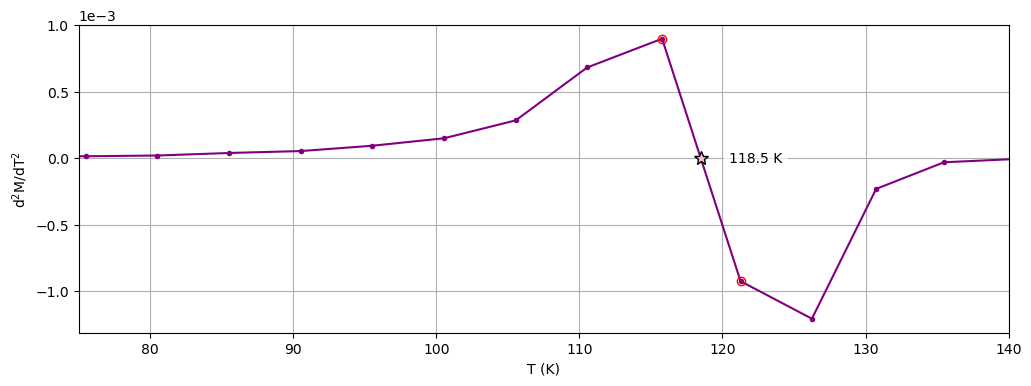

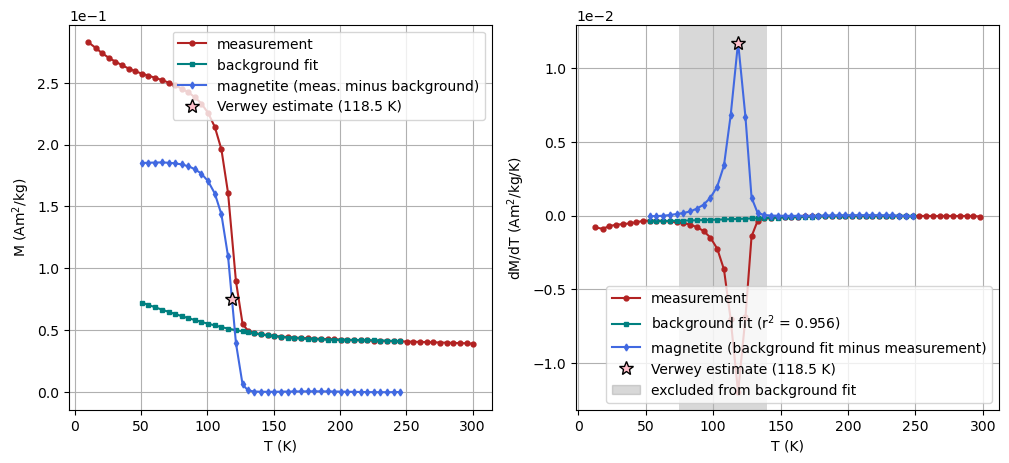

In [6]:
specimen_name = 'SD38-3r'
fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data = rmag.extract_mpms_data_dc(measurements, specimen_name)
temps = fc_data['meas_temp']
mags = fc_data['magn_mass']

verwey_estimate, remanence_loss = rmag.verwey_estimate(temps, mags, 
                                       t_range_background_min=50,
                                       t_range_background_max=250,
                                       excluded_t_min=75,
                                       excluded_t_max=140,
                                       poly_deg=3,
                                       plot_zero_crossing = True)

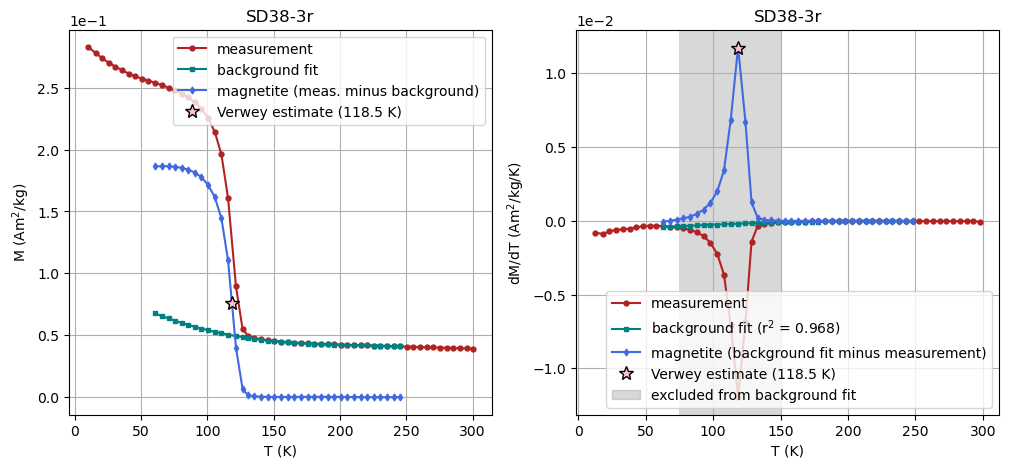

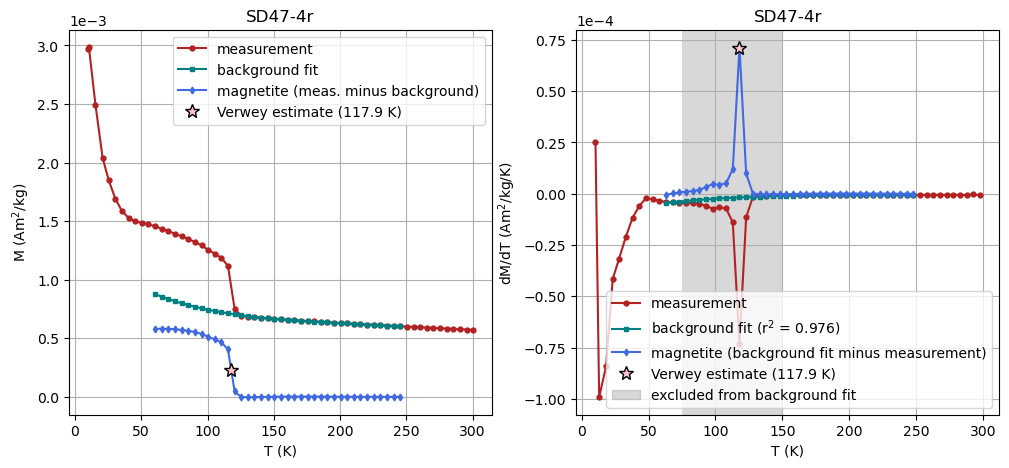

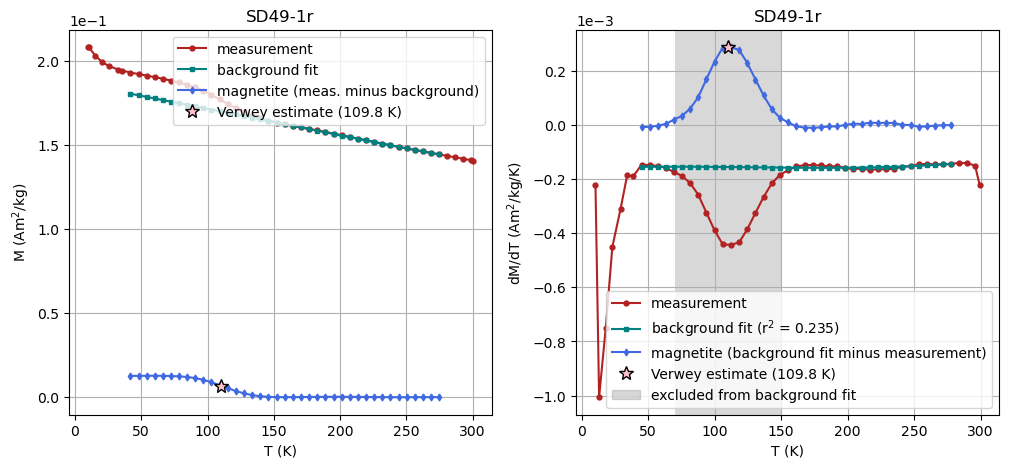

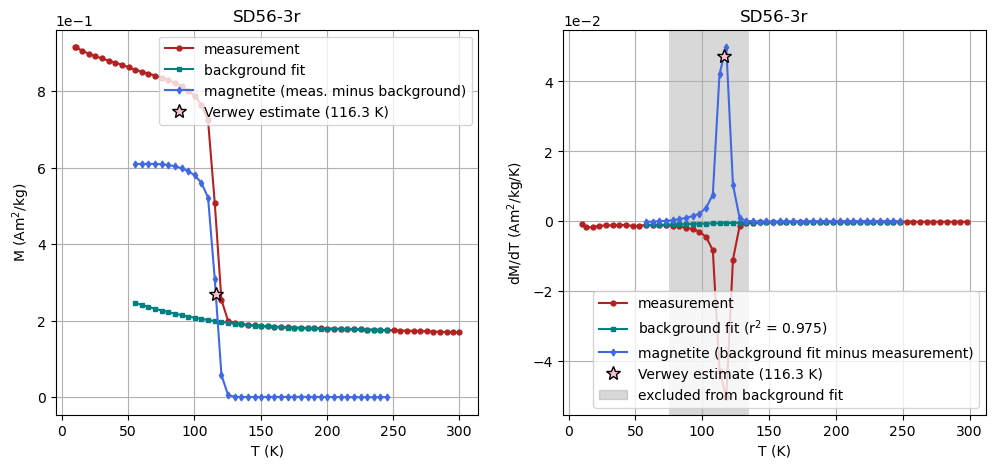

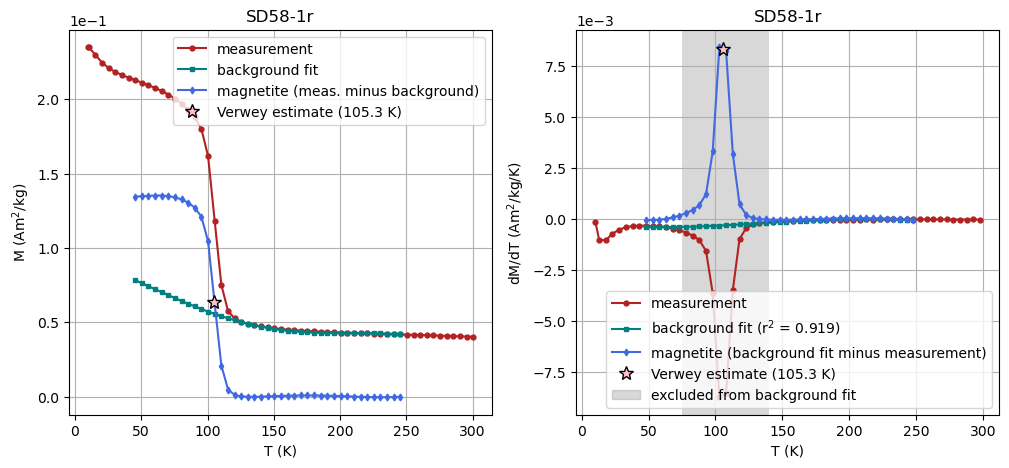

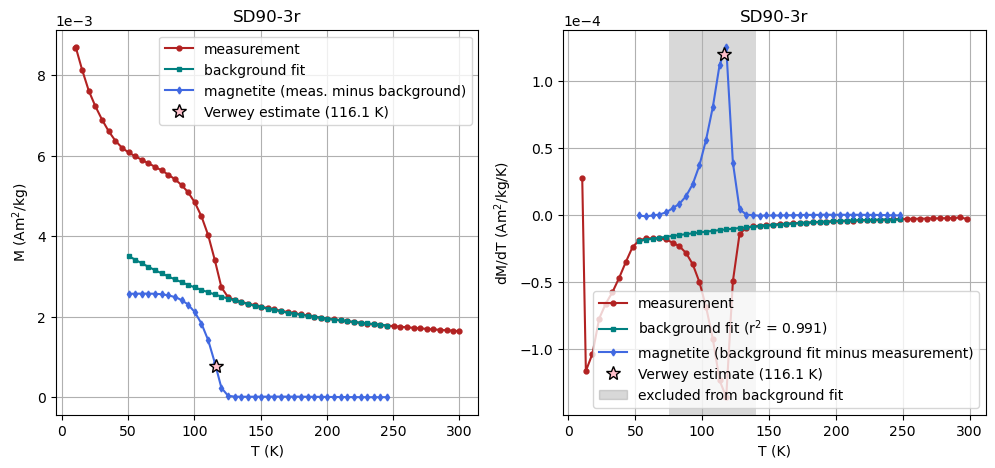

In [7]:
# Define a list of dictionaries, each containing the specimen name and its unique parameters
specimens_with_params = [
    {
        'specimen_name': 'SD38-3r',
        'params': {
            't_range_background_min': 60,
            't_range_background_max': 250,
            'excluded_t_min': 75,
            'excluded_t_max': 150,
            'poly_deg': 3,
            'method_codes': 'SM-1DMAX:LP-FC'
        }
    },
    {
        'specimen_name': 'SD47-4r',
        'params': {
            't_range_background_min': 60,
            't_range_background_max': 250,
            'excluded_t_min': 75,
            'excluded_t_max': 150,
            'poly_deg': 3,
            'method_codes': 'SM-1DMAX:LP-FC'
        }
    },
    {
        'specimen_name': 'SD49-1r',
        'params': {
            't_range_background_min': 40,
            't_range_background_max': 280,
            'excluded_t_min': 70,
            'excluded_t_max': 150,
            'poly_deg': 3,
            'method_codes': 'SM-1DMAX:LP-FC'
        }
    },
    {
        'specimen_name': 'SD56-3r',
        'params': {
            't_range_background_min': 55,
            't_range_background_max': 250,
            'excluded_t_min': 75,
            'excluded_t_max': 135,
            'poly_deg': 3,
            'method_codes': 'SM-1DMAX:LP-FC'
        }
    },
    {
        'specimen_name': 'SD58-1r',
        'params': {
            't_range_background_min': 45,
            't_range_background_max': 250,
            'excluded_t_min': 75,
            'excluded_t_max': 140,
            'poly_deg': 3,
            'method_codes': 'SM-1DMAX:LP-FC'
        }
    },
    {
        'specimen_name': 'SD90-3r',
        'params': {
            't_range_background_min': 50,
            't_range_background_max': 250,
            'excluded_t_min': 75,
            'excluded_t_max': 140,
            'poly_deg': 3,
            'method_codes': 'SM-1DMAX:LP-FC'
        }
    }
]

verwey_estimates = rmag.verwey_estimate_multiple_specimens(specimens_with_params, measurements)

In [8]:
verwey_estimates

,specimen,critical_temp,critical_temp_type,remanence_loss,t_range_background_min,t_range_background_max,excluded_t_min,excluded_t_max,poly_deg,method_codes
0,SD38-3r,118.481961,Verwey,0.181978,60,250,75,150,3,SM-1DMAX:LP-FC
1,SD47-4r,117.899550,Verwey,0.000570,60,250,75,150,3,SM-1DMAX:LP-FC
2,SD49-1r,109.797328,Verwey,0.012586,40,280,70,150,3,SM-1DMAX:LP-FC
3,SD56-3r,116.261470,Verwey,0.606131,55,250,75,135,3,SM-1DMAX:LP-FC
4,SD58-1r,105.262967,Verwey,0.133706,45,250,75,140,3,SM-1DMAX:LP-FC
5,SD90-3r,116.143870,Verwey,0.002529,50,250,75,140,3,SM-1DMAX:LP-FC


## Thermal demagnetization data

The thermal demagnetization data from sister specimens to the rock magnetic specimens are visualized below.

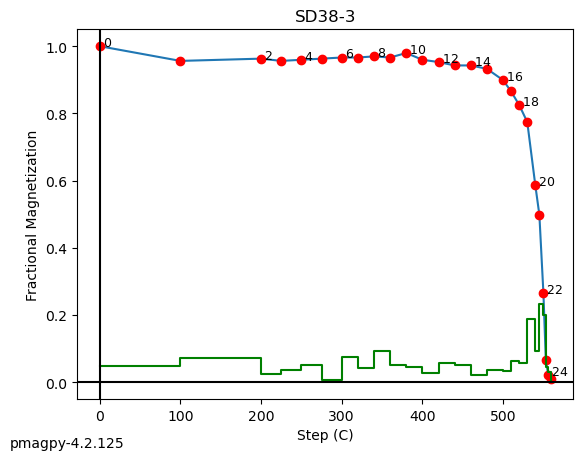

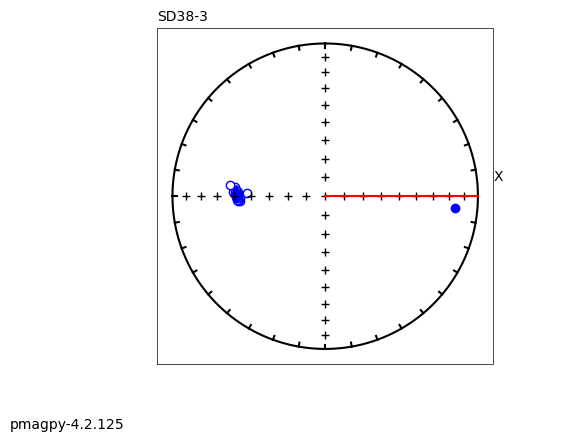

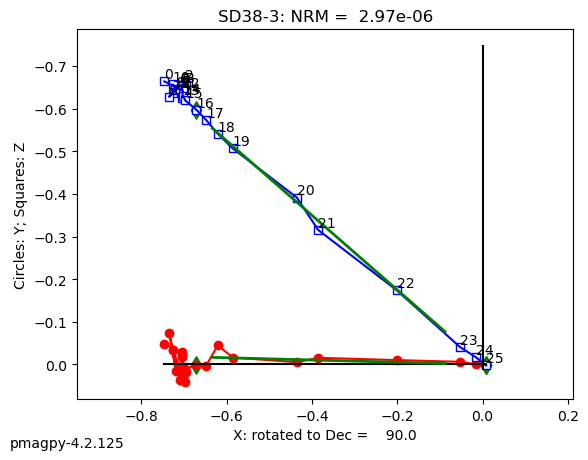

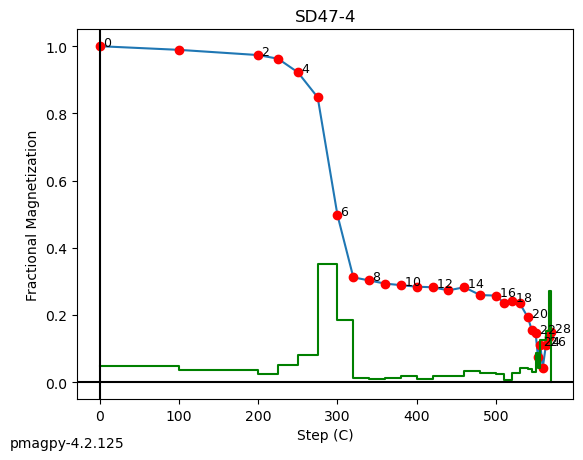

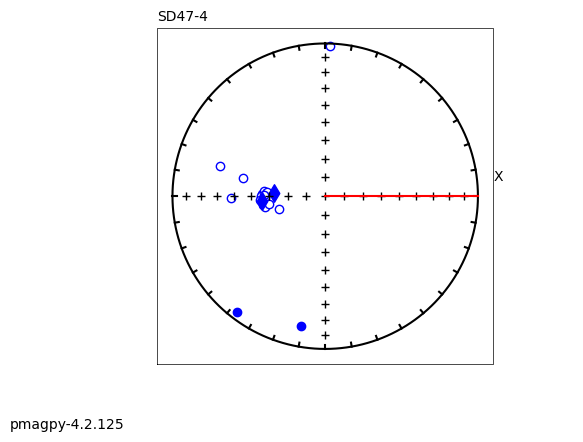

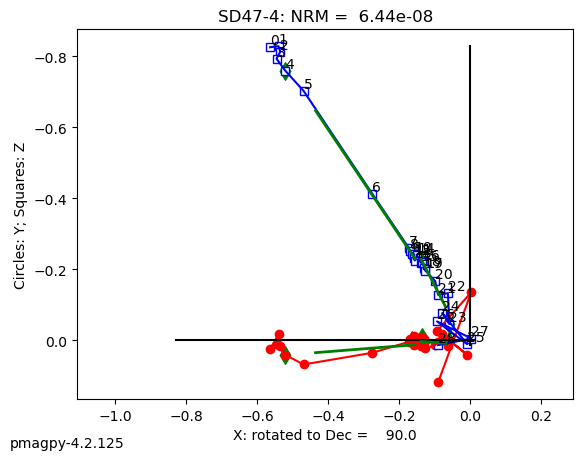

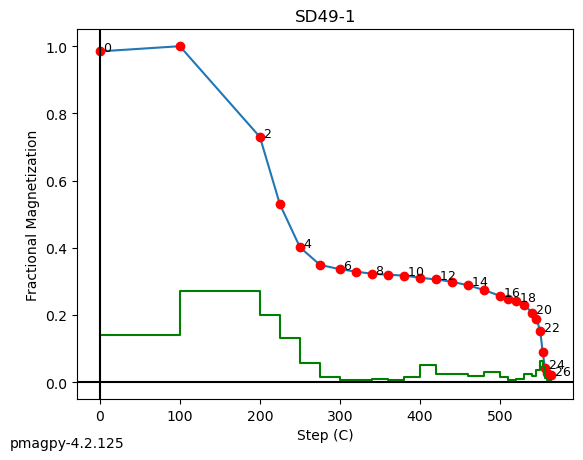

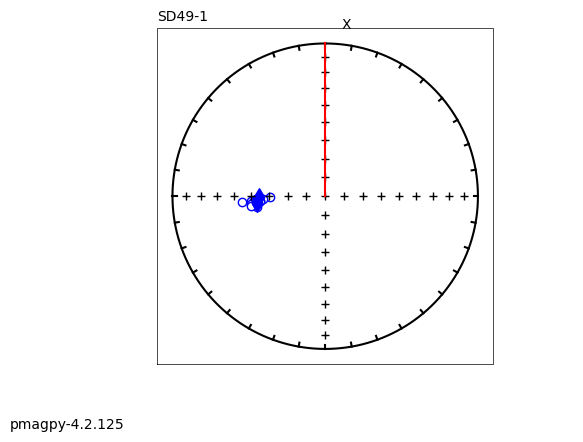

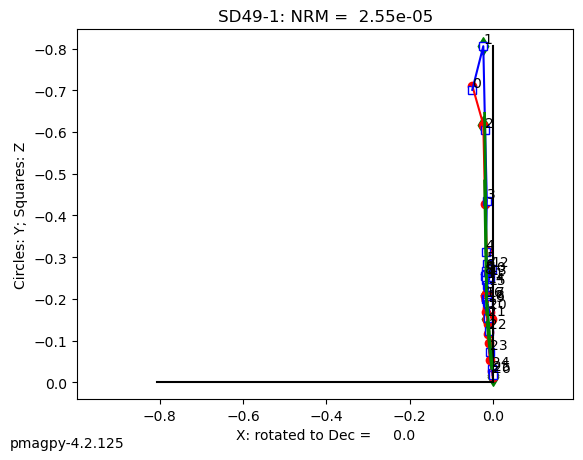

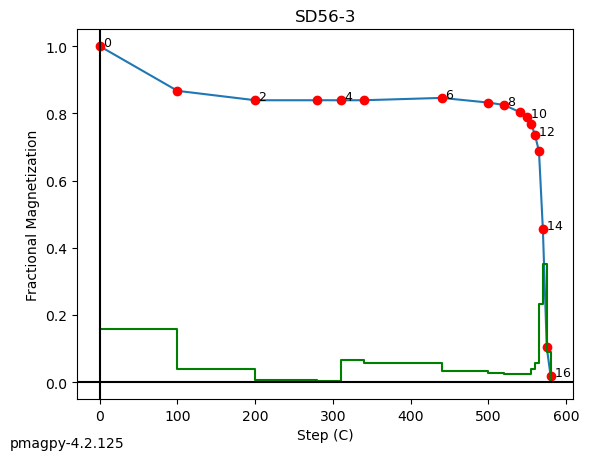

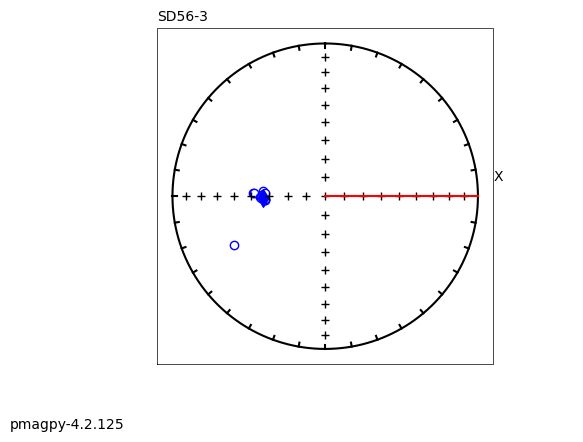

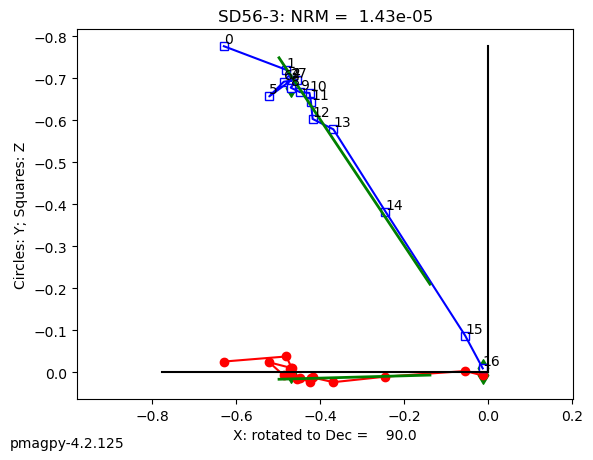

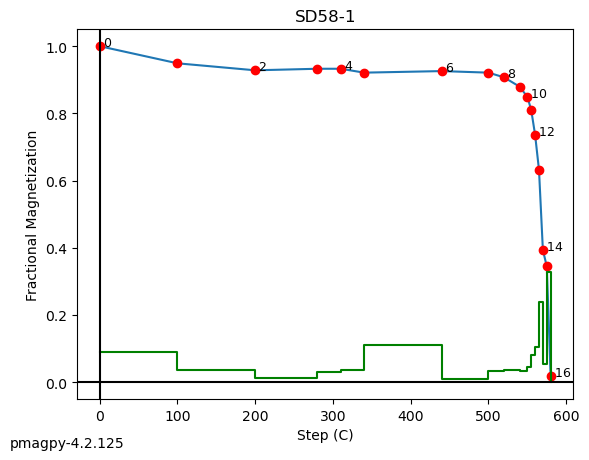

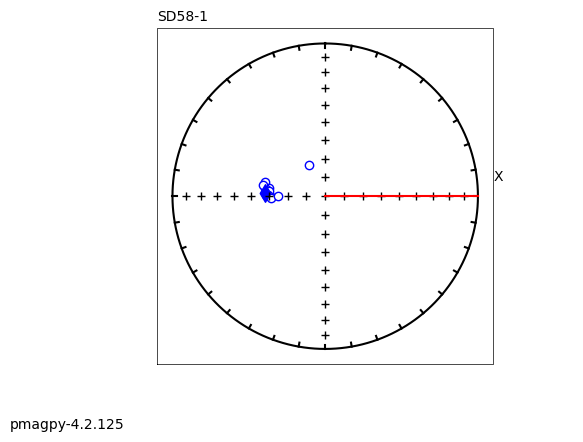

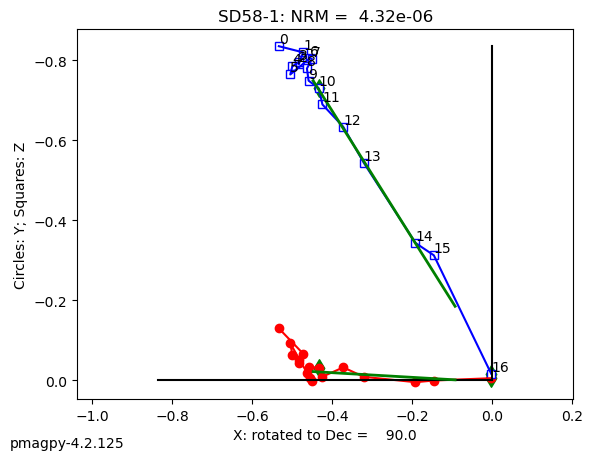

Can't select 'bad' point as start for PCA
problem removing bad data in pmag.domean start of datablock shifted:
original: 2
after removal: 3


(True, [])

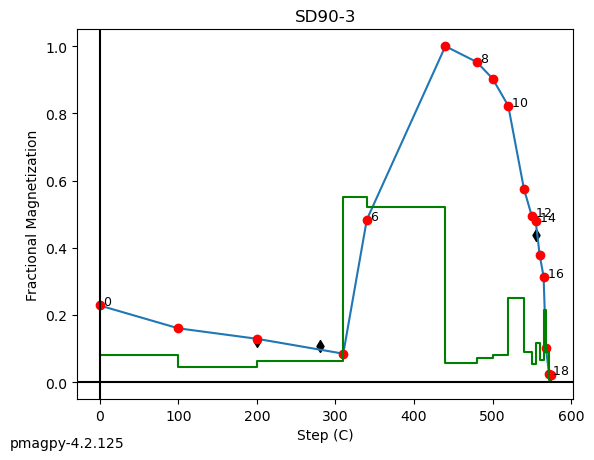

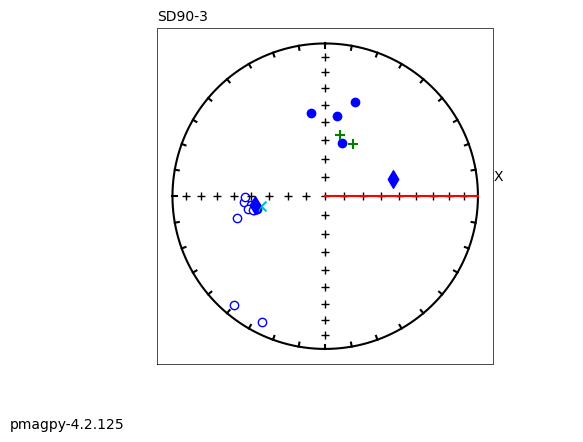

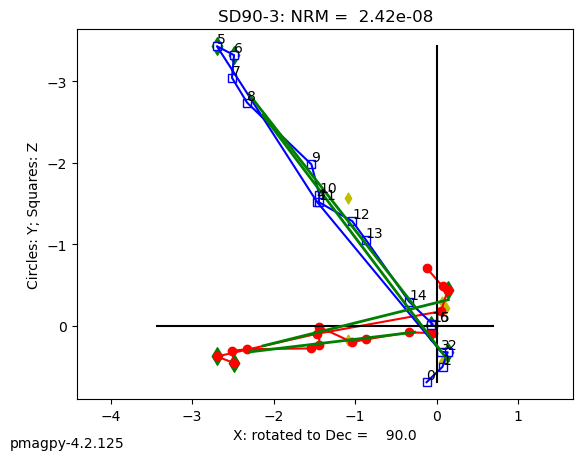

In [9]:
ipmag.zeq_magic(contribution=contribution, save_plots=False, specimen='SD38-3',crd='g', angle=90)
plt.show()
ipmag.zeq_magic(contribution=contribution, save_plots=False, specimen='SD47-4',crd='g', angle=90)
plt.show()
ipmag.zeq_magic(contribution=contribution, save_plots=False, specimen='SD49-1',crd='g', angle=0)
plt.show()
ipmag.zeq_magic(contribution=contribution, save_plots=False, specimen='SD56-3',crd='g', angle=90)
plt.show()
ipmag.zeq_magic(contribution=contribution, save_plots=False, specimen='SD58-1',crd='g', angle=90)
plt.show()
ipmag.zeq_magic(contribution=contribution, save_plots=False, specimen='SD90-3',crd='g', angle=90)